In [1]:
# functie
def foo():
    print("Hello from foo")

In [2]:
class Person:
    """this is a docstring about the Person class"""
    def __init__(self, name) -> None:
        """the init method is a constructor which defines
        the name attribute of the Person object"""
        self.name = name

    # method
    def greet(self, other: object) -> None:
        """this method prints a greeting from this Person"""
        if not isinstance(other, Person):
            raise TypeError("other moet een Person zijn")
        print("Hello from", self.name, "to", other.name)
bart = Person("Bart")
gerard = Person("Gerard")
print(bart == gerard)
bart.greet(gerard)

False
Hello from Bart to Gerard


1. Find the mistakes!

In [3]:
class Teacher(Person):
    
    def __init__(self, name, colleagues: str) -> None:
        super().__init__(name)
        self.colleagues = colleagues
        print(self.colleagues[0].name)
        
    def colleagues_names(self) -> list[str]:
        return [colleague.name for colleague in self.colleagues]
gerard = Teacher("Gerard", [bart,])
gerard.colleagues_names()

Bart


['Bart']

Abstract classes

In [4]:
from abc import ABC, abstractmethod
# abstract classes can't be instantiated
class Ghost(ABC):
    
    def __init__(self,name) -> None:
        self.name = name
    
    @abstractmethod
    def scare(self):
        return


In [5]:
# abstract_ghost = Ghost("SomeName") # Error

In [6]:
class SillyGhost(Ghost):
    
    def __init__(self, name) -> None:
        super().__init__(name)
# silly_ghost = SillyGhost("Silly")Error, why?
# silly_ghost.scare() 

In [7]:
# Alll HorrorGhosts are Ghosts, but not all Ghosts are HorrorGhosts
class HorrorGhost(Ghost):
    
    def __init__(self,name) -> None:
        super().__init__(name)
    
    def scare(self):
        print(f"Booohh, {self.name} the {self.__class__.__name__} is scaring you")
casper = HorrorGhost("Casper")
casper.scare()

Booohh, Casper the HorrorGhost is scaring you


In [8]:
class RelegationGhost(Ghost):
    
    def __init__(self,name,club) -> None:
        self.club = club
        super().__init__(name)
    
    # scare 
    def scare(self):
        print(f"Booohh, {self.name} is scaring you")
        print(f"{self.name} is relegating {self.club} to the second division")

In [9]:
relegation_ghost = RelegationGhost("Degradatie Spook", "Ajax")
relegation_ghost.scare()
type(relegation_ghost)


Booohh, Degradatie Spook is scaring you
Degradatie Spook is relegating Ajax to the second division


__main__.RelegationGhost

'Real world example'

In [10]:
class Character:
    
    def __init__(self,name, universe) -> None:
        self.name = name
        self.universe = universe
        
    def attack(self):
        print(f"{self.name} is attacking")

Polymorphism at it's finest

In [11]:
# spot the 'mistake'
class Boo(Ghost,Character):
    
    def __init__(self, name) -> None:
        Ghost.__init__(self,name)
        Character.__init__(self,name,"mario universe")
        
    
    def scare(self):
        print(f"Booohh, {self.name} is scaring you")
        
    
    def __repr__(self) -> str:
        return f"Boo({self.name})"
    
    def __eq__(self, __value) -> bool:
        return self.name == __value.name and self.universe == __value.universe and isinstance(__value, Boo)
    
    # override not equal
    def __ne__(self, __value) -> bool:
        return not self.__eq__(__value)

In [12]:
boo = Boo("Boo")
boo2 = Boo("Boo")
boo3 = Character("Boo","mario universe")

In [13]:
print(boo.name) # Boo, str
print(boo.universe) # mario universe, str
boo.attack() # Boo is attacking, None
print(type(boo)) # <class '__main__.Boo'>, type
print(boo) # Boo(Boo), str
print(boo == boo2) # True, bool
print(boo == boo3) # False, bool

Boo
mario universe
Boo is attacking
<class '__main__.Boo'>
Boo(Boo)
True
False


Real world example

Exercise 1. Try to find the mistakes made in the following code.

Exercise 2. Create seperate files for each module and import them into 'opdracht1.py' and try to forecast stock prices given in the input from file 'data.json'

In [14]:
from abc import ABC, abstractmethod
import pandas as pd


"""
step sub-classes must implement method process
"""


class Step(ABC):

    def __init__(self, model=None, class_type=None):
        """ Instantiate the Step class """
        # NOTE: issubclass(self.__class__, type) werkt niet
        if self.__class__ == class_type:
            raise Exception("I am abstract!")
        self.model = model

    @property
    def name(self) -> str:
        """ Return the name of the step """
        print(self.__class__.__name__) # TODO debug
        return str(self.__class__.__name__)

    @abstractmethod
    def process(self, data) -> pd.DataFrame:
        """abstract method for using the data of the step."""
        pass


"A pipeline is a 'tuple containing instructions' that can be processed using self.process()"

In [15]:
# import iterable class
from collections.abc import Iterable
class Pipeline:
    # What is a Pipeline?
    # A Pipeline is a set of instructions
    def __init__(self, steps: Iterable[Step]):
        """ Instantiate the Pipeline class by recieving a list of steps """
        if steps == ():
            raise ValueError("Pipeline steps are not specified")

        # OPTIONAL
        # if first step is not a input step (possible that inputstep is abstract, raise error)
        # if not isinstance(steps[0], Input):
        #     raise ValueError(f"First step in pipeline must be an input step it is now {type(steps[0])}")
        self.steps = steps

    # process -> take some data, modify it, output some data
    def process(self) -> pd.DataFrame:  # nog onzeker over format van data
        """ Process the data of the pipeline so that it can be used by the next step """
        for step in self.steps:
            print(f"Processing step: {step.name}")
            step.config = self.settings
            # TODO: file aanmaken na elke stap zodat het niet opnieuw gedaan hoeft te worden indien er een fout optreedt
            # if isinstance(step, Input):
            #     self.data = step.process()
            # else:
            #     self.data = step.process(data=self.data)
            self.data = step.process(data=self.data)
        return self.data

In [16]:
import json

class Input(Step):
    """" Class for the input step"""
    """" should be the first step in the pipeline """

    def __init__(self):
        """ Instantiate the Input class """
        super().__init__()
        if self.__class__ == Input:
            raise Exception("I am abstract!")

    @property
    def name(self) -> str:
        """ Return the name of the step """
        return self.__class__.__name__

    def process(self) -> object:
        """ abstract method for using the data of the step """
        pass
    

class JSONInput(Input):
    """ Class for the JSONInput step """
    def __init__(self, path: str):
        """ Instantiate the JSONInput class """
        super().__init__()
        self.path = path

    def process(self) -> pd.DataFrame:
        """ Process the data of the step so that it can be used by the next step """
        with open(self.path, "r") as f:
            data = json.load(f)['historicalStockList']
        df = pd.DataFrame(data[0]['data'])
        # set yhat_close_long and yhat_close_short to 'price' of that day in the dataframe
        data_of_apple = data[0]['data']
        # for each day in the dataframe set yhat_close_long of that row equal to the price of that day
        for day in data_of_apple:
            df.loc[df['date'] == day['date'], 'yhat_close_long'] = day['yhat_close_long']['price']
            # same for yhat_close_short
            df.loc[df['date'] == day['date'], 'yhat_close_short'] = day['yhat_close_short']['price']
            # get std in dataframe
            df.loc[df['date'] == day['date'], 'std_short'] = day['yhat_close_short']['std']
            # get std long in dataframe
            df.loc[df['date'] == day['date'], 'std_long'] = day['yhat_close_long']['std']
        return df 

    
df = JSONInput("data.json").process()
df.head()


,date,open,high,low,close,vwap,volume,yhat_close_long,yhat_close_short,std_short,std_long
0,2023-04-28,168.490,169.850,167.8801,169.68,168.95,55275851,169.68,169.68,1.373281,0.267265
1,2023-04-27,165.190,168.560,165.1900,168.41,167.32,64898729,168.41,168.41,1.561918,3.167073
2,2023-04-26,163.055,165.280,162.8000,163.76,163.91,45487296,163.76,163.76,2.843088,4.187697
3,2023-04-25,165.190,166.305,163.7300,163.77,164.65,48652863,163.77,163.77,1.890833,2.988761
4,2023-04-24,165.000,165.600,163.8900,165.33,164.94,41449581,165.33,165.33,0.440072,3.107493


In [17]:
df_last_day = df.iloc[-1]['date']
df_first_day = df.iloc[0]['date']
beurs_days = pd.DataFrame(pd.date_range(start=df_last_day, end=df_first_day, freq='B'), columns=['date'])
beurs_days.head()

,date
0,2023-03-01
1,2023-03-02
2,2023-03-03
3,2023-03-06
4,2023-03-07


In [18]:
from prophet import Prophet

# create a new dataframe with the required columns
df_prophet = df[['date', 'yhat_close_long']].copy()
df_prophet['date'] = pd.to_datetime(df_prophet['date'])
beurs_days['date'] = pd.to_datetime(beurs_days['date'])

# merge the two dataframes on the 'date' column using a left join
merged_df = pd.merge(beurs_days, df_prophet, how='left', left_on='date', right_on='date')
df_prophet
df_prophet =merged_df[['date', 'yhat_close_long']].copy()
df_prophet.rename(columns={'date': 'ds', 'yhat_close_long': 'y'}, inplace=True)
df_prophet.columns = ['ds', 'y']

# create a new Prophet model
model = Prophet()

# fit the model on the data
model.fit(df_prophet)

# create a dataframe with the dates for the next month
future = model.make_future_dataframe(periods=30)

# make predictions for the next month
forecast = model.predict(future)

# select the relevant columns from the forecast dataframe

# select the predictions for the next month

22:50:33 - cmdstanpy - INFO - Chain [1] start processing
22:50:33 - cmdstanpy - INFO - Chain [1] done processing


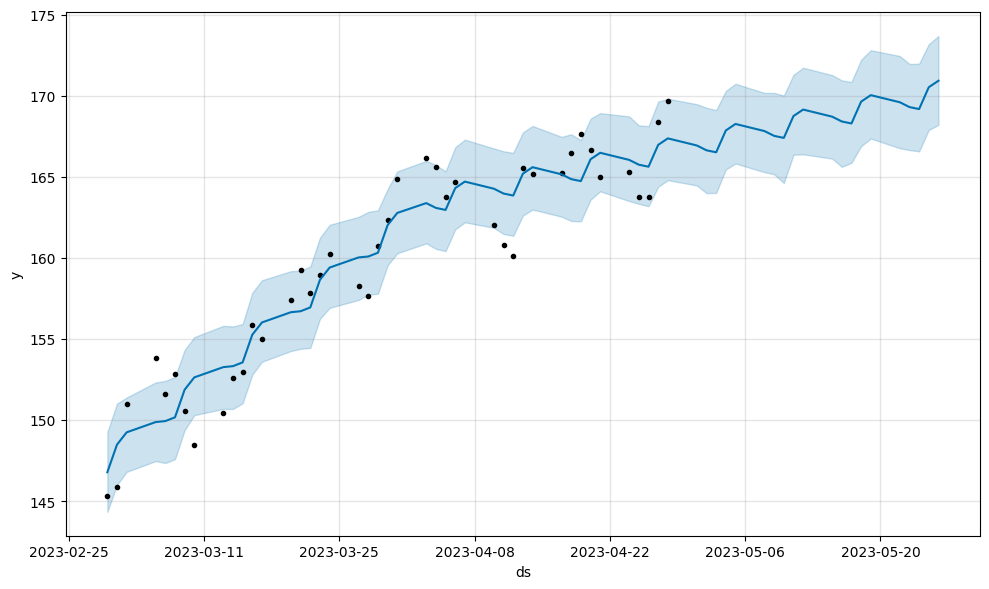

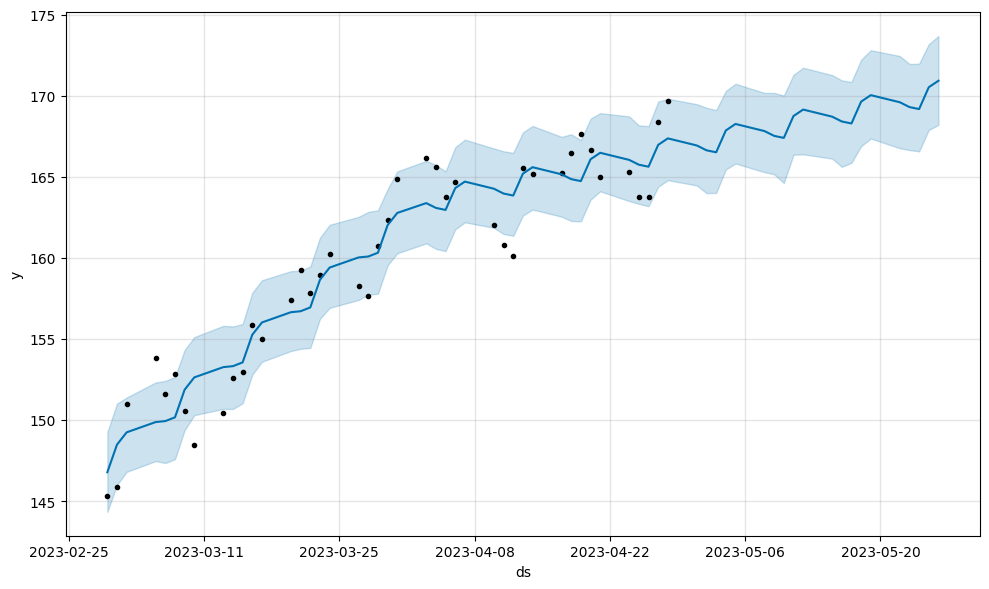

In [19]:
# forecast_next_month
# remove if yhat is negative
forecast = forecast[forecast['yhat'] > 0]
model.plot(forecast)

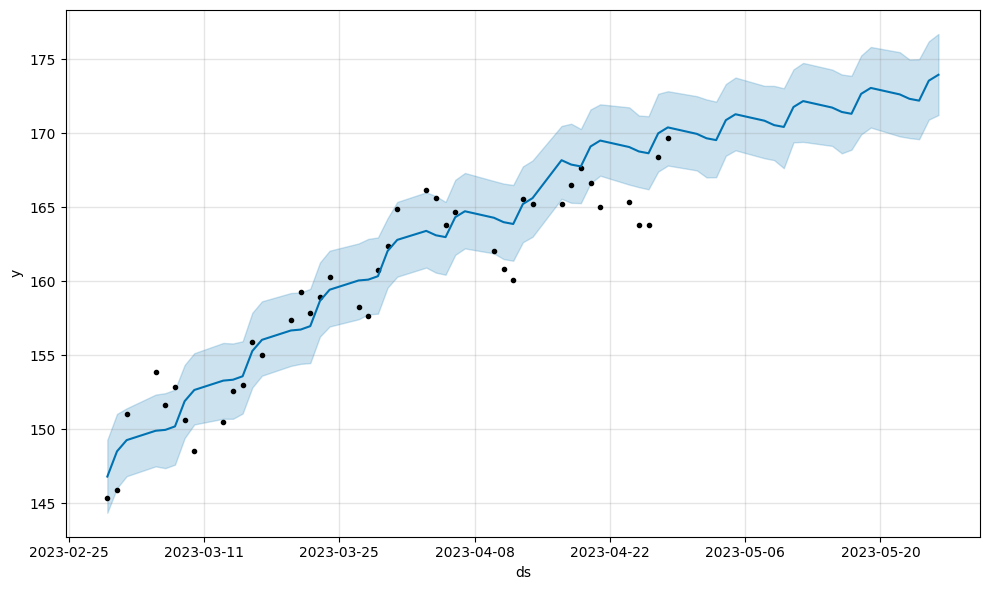

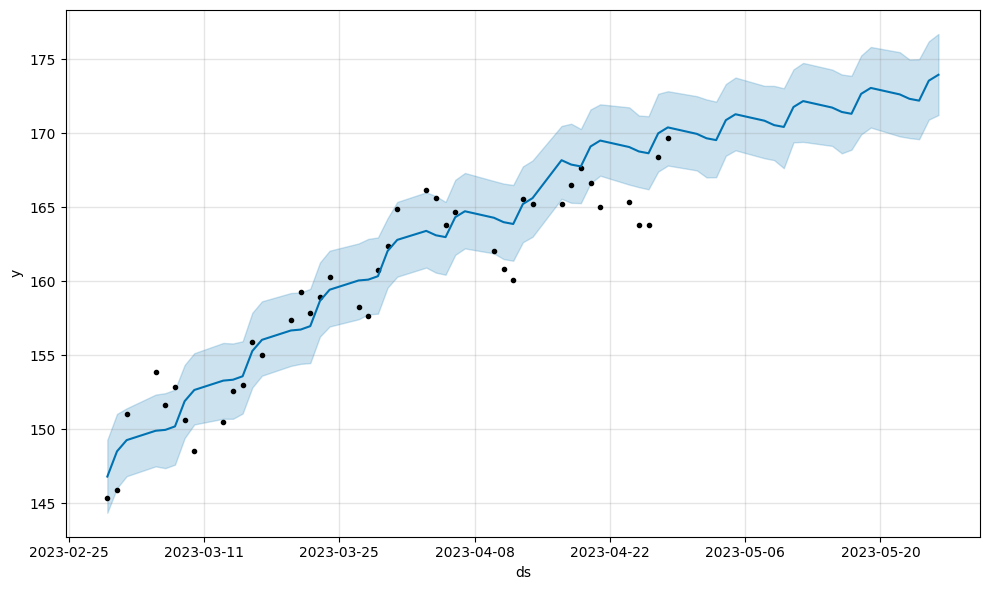

In [20]:
# all values in trend	yhat_lower	yhat_upper	trend_lower	trend_upper	additive_terms	additive_terms_lower	additive_terms_upper	weekly	weekly_lower	weekly_upper do +10
columns = ['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper','yhat']
# select the last 30 rows of the forecast dataframe
last_30 = forecast.iloc[-30:]

# add 3 to the selected columns using the += operator
forecast.loc[last_30.index, columns] += 3
model.plot(forecast)

BONUS: Antwoord op het raadsel

In [31]:
class Person:
    def __init__(self, name):
        self.name = name

class Group:
    def __init__(self, persons):
        self.persons = persons

    def __str__(self):
        names = [person.name for person in self.persons]
        return ', '.join(names)
    
    def __add__(self, other):
        return Group(self.persons + other.persons)

# Example usage:
person1 = Person('Alice')
person2 = Person('Bob')
person3 = Person('Charlie')
gerard = Person("Gerard")
bart = Person("Bart")

group1 = Group([person1, person2, person3])
group2 = Group([bart,gerard])
group3 = group1 + group2
print(group3)  # This will print the names of the persons in the group
print(type(group3)) 

Alice, Bob, Charlie, Bart, Gerard
<class '__main__.Group'>
